In [1]:
import json
from glob import glob
import pandas as pd
from tqdm import tqdm
from ggshow import ggshow

# Analysis after simulating all cases with 'simulate-all.py'
# Assume all simulation results are in './outputs'

In [2]:
def parse_json(jsonfile):
    with open(jsonfile) as f:
        x = json.load(f)
    # steps to str
    s = x.pop("steps")
    s = "-".join("%s_%s" % tuple(a) for a in s)
    x["steps"] = s
    return x

files = glob("outputs/*.json")
x = [parse_json(f) for f in tqdm(files)]
x = pd.DataFrame(x)

x.to_csv("wordle-simulation-results.csv", index=False)
x

100%|██████████████████████████████████| 51788/51788 [00:01<00:00, 32040.71it/s]


,answer_word,metric,n_steps,elapsed_sec,steps
0,speug,mean_n,4,20.257433,lares_00011-point_10000-appuy_02020-speug_22222
1,seaze,mean_entropy,5,7.319369,tares_01011-spald_20200-vehme_02002-sease_2220...
2,miaul,max_n,4,24.692026,serai_00011-amnia_11010-miaou_22201-miaul_22222
3,vaped,mean_n,5,11.137489,lares_02020-nymph_00010-capot_02200-agave_1001...
4,gasts,mean_n,6,32.105418,lares_02002-tunic_10000-basho_02200-flimp_0000...
...,...,...,...,...,...
51783,naeve,random,7,0.112808,munts_00100-chang_00110-onlay_01010-rawin_0200...
51784,bleed,max_n,4,55.455609,serai_01000-dolce_10101-beget_21020-bleed_22222
51785,bawns,random,9,0.109339,munts_00102-gnaws_01112-rawns_02222-lawns_0222...
51786,pechs,random,6,0.121125,munts_00002-epris_11002-pelas_22002-pekes_2200...


In [3]:
tmp = x.groupby("metric")["n_steps"].describe()
tmp["count"] = tmp["count"].astype(int)
tmp

,count,mean,std,min,25%,50%,75%,max
metric,,,,,,,,
max_n,12947,4.277671,0.787511,1.0,4.0,4.0,5.0,8.0
mean_entropy,12947,4.079787,0.739548,1.0,4.0,4.0,4.0,7.0
mean_n,12947,4.123426,0.727978,1.0,4.0,4.0,5.0,8.0
random,12947,4.929096,1.523362,1.0,4.0,5.0,6.0,17.0


n_steps,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
metric,,,,,,,,,,,,,,,,,
max_n,1,66,1735,6408,4054,642,37,4,0,0,0,0,0,0,0,0,0
mean_entropy,1,58,2448,7254,2795,368,23,0,0,0,0,0,0,0,0,0,0
mean_n,1,55,2142,7286,3099,339,24,1,0,0,0,0,0,0,0,0,0
random,1,154,1512,4039,3743,1880,840,407,195,92,41,20,12,6,2,2,1


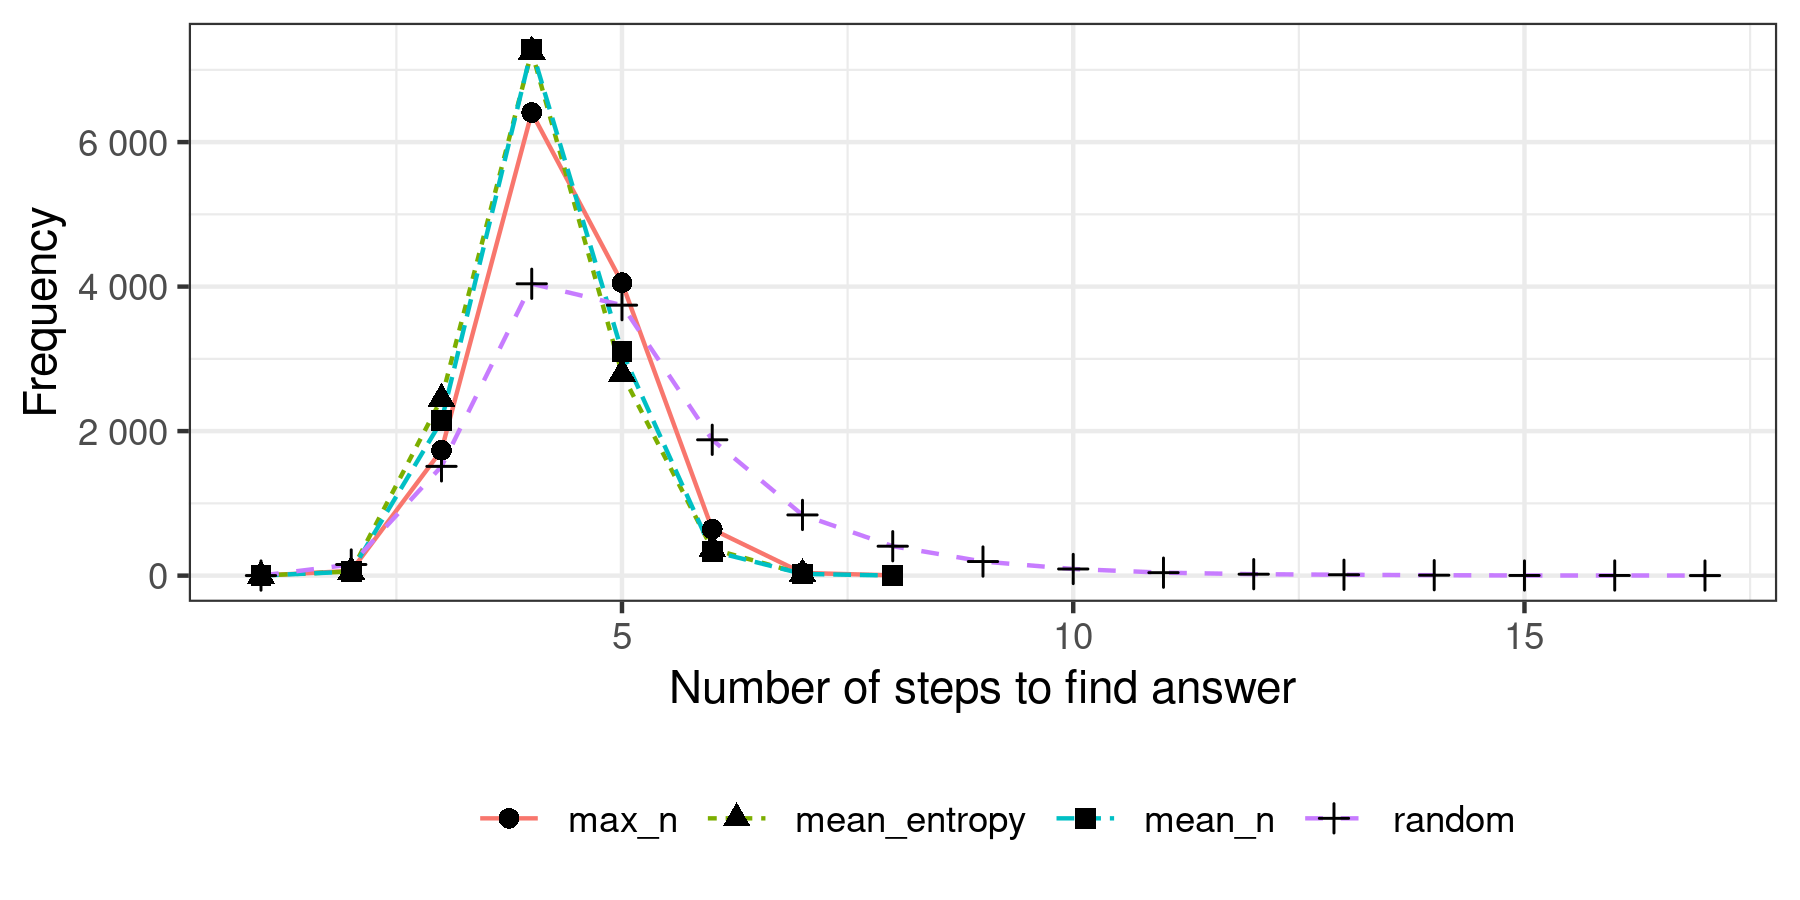

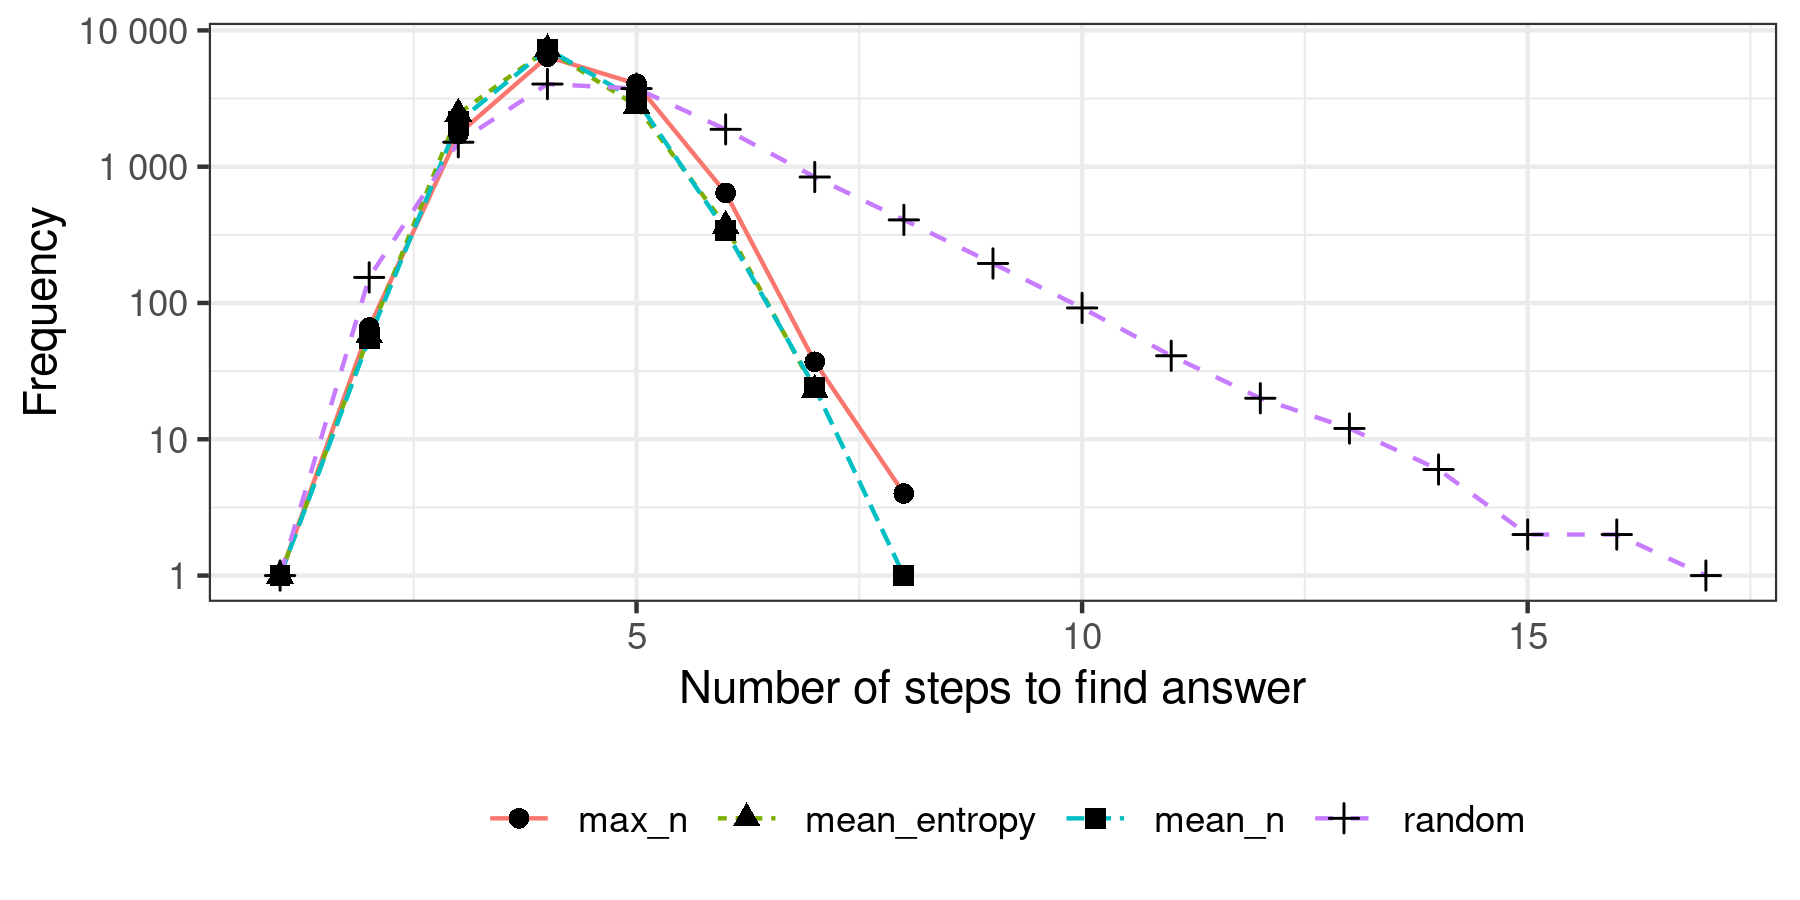

In [4]:
tmp = x.groupby(["metric", "n_steps"], as_index=False)["answer_word"].size().rename(columns={"size":"freq"})
display(tmp.pivot(index="metric", columns="n_steps", values="freq").fillna(0).astype(int))

g = ggshow(
"""
ggplot(x, aes(n_steps, freq)) +
  geom_line(aes(linetype=metric, color=metric)) +
  geom_point(aes(shape=metric), size=2) +
  scale_y_continuous(labels=scales::number_format(1)) +
  theme_bw() +
  xlab("Number of steps to find answer") + ylab("Frequency") +
  theme(legend.position="bottom", legend.title=element_blank())
""",
    x=tmp, width=6, height=3, dispwidth=700
)
display(g)

g = ggshow(
"""
ggplot(x, aes(n_steps, freq)) +
  geom_line(aes(linetype=metric, color=metric)) +
  geom_point(aes(shape=metric), size=2) +
  scale_y_log10(labels=scales::number_format(1)) +
  theme_bw() +
  xlab("Number of steps to find answer") + ylab("Frequency") +
  theme(legend.position="bottom", legend.title=element_blank())
""",
    x=tmp, width=6, height=3, dispwidth=700
)
display(g)

In [5]:
# most 'difficult' cases
def print_row(row):
    print()
    print("metric: %s, n steps: %d" % (row.metric, row.n_steps))
    print("-------------------------------")
    print(row.steps.replace("_", "  ").replace("-", "\n"))

for m in sorted(x.metric.unique()):
    tmp = x[x.metric==m].sort_values("n_steps", ascending=False).head(4)
    for _, row in tmp.iterrows():
        print_row(row)


metric: max_n, n steps: 8
-------------------------------
serai  12000
meted  02100
nests  02222
glyph  00000
bawks  00002
aflaj  00000
avize  00001
tests  22222

metric: max_n, n steps: 8
-------------------------------
serai  12000
meted  02100
nests  02222
glyph  00000
bawks  00002
aflaj  00000
avize  01001
vests  22222

metric: max_n, n steps: 8
-------------------------------
serai  12000
meted  02100
nests  02222
glyph  00000
bawks  00002
aflaj  00000
avize  00011
zests  22222

metric: max_n, n steps: 8
-------------------------------
serai  10001
lints  12002
dowly  00020
bumph  00000
cezve  00000
aflaj  00200
gills  02222
kills  22222

metric: mean_entropy, n steps: 7
-------------------------------
tares  02002
plink  00000
gumbo  00000
dawah  02020
civic  00200
favas  02222
javas  22222

metric: mean_entropy, n steps: 7
-------------------------------
tares  00022
dolci  00000
punky  00000
meshy  02100
fezzy  02000
swage  10001
vexes  22222

metric: mean_entropy, n steps: 7
